The purpose of this method is just to explore the method and consider (A) how more advanced users may interact and (B) how sensitivity testing may work

In [8]:
# Import libraries
import numpy as np
import scipy
from scipy.stats import norm, lognorm
import matplotlib.pyplot as plt
import pandas as pd


In [11]:
def calculate_cumulative_conf(areaP90: float=1., areaP10: float=10., pdP90: float=10., pdP10: float=24):
    """Calculate cumulative confidence level for expected development size in MW

    Args:
        areaP90 (float): pessimistic area in sqkm
        areaP10 (float): optimistic area in sqkm
        pdP90 (float): pessimistic power density in MWe/sqkm
        pdP10 (float): optimistic power density in MWe/sqkm

    Returns:
        prob_df (pandas Dataframe): cumulative confidence curve in Reservoir Size
    """
    # calculate area > 250 °C
    area_mu = ((np.log(areaP90)+np.log(areaP10))/2)
    area_sigma = (np.log(areaP10)-np.log(areaP90))/((norm.ppf(0.9)-(norm.ppf(0.1))))

    # calculate powerdensity mean and standard dev
    powerdens_mu = ((np.log(pdP90)+np.log(pdP10))/2)
    powerdens_sigma = (np.log(pdP10)-np.log(pdP90))/((norm.ppf(0.9)-(norm.ppf(0.1))))


    capacity_mu = area_mu + powerdens_mu
    capacity_sigma = ((area_sigma**2)+(powerdens_sigma**2))**0.5
    eds = [lognorm.ppf(x/100, capacity_sigma, loc=0, scale=np.exp(capacity_mu)) for x in range(0,100)]
    indx = list(np.arange(1,101)[::-1])
    #edsepc_tups = list(zip(indx,eds))
    #prob_df = pd.DataFrame(edsepc_tups, columns = ['Cumulative confidence (%)', 'expected development size (MW)'])

    return indx, eds 

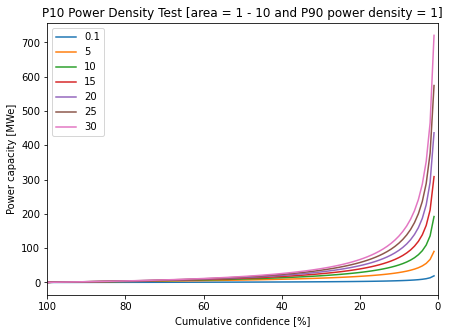

In [38]:
# Test the effect of varying the P10 power density

# make a dataframe just with the index
index, estimate = calculate_cumulative_conf(2, 8, 10, 15)
df = pd.DataFrame(index, columns = ['Cum_conf_%'])

# calculate power capacity using a range of P10 power densities
P90_area = 1
P10_area = 10
P90_powerdensity = 1
P10_powerdensities = [0.1,5,10,15,20,25,30]

for P10_powerdensity in P10_powerdensities:
    index, estimate = calculate_cumulative_conf(P90_area, P10_area, P90_powerdensity, P10_powerdensity)
    column_head = str(P10_powerdensity)
    df[column_head] = estimate

# plot results
fig, ax = plt.subplots(1,1,figsize=(7,5))

for P10_powerdensity in P10_powerdensities:
    ax.plot(
        df['Cum_conf_%'],
        df[str(P10_powerdensity)],
        label = str(P10_powerdensity)
        )

ax.set_xlim(100,0)
ax.set_xlabel('Cumulative confidence [%]')
ax.set_ylabel('Power capacity [MWe]')
ax.set_title('P10 Power Density Test [area = 1 - 10 and P90 power density = 1]')
ax.legend()

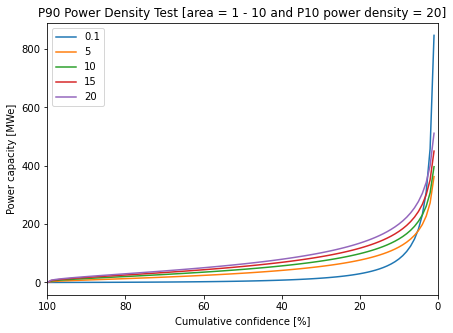

In [43]:
# Test the effect of varying the P90 power density

# make a dataframe just with the index
index, estimate = calculate_cumulative_conf(2, 8, 10, 15)
df = pd.DataFrame(index, columns = ['Cum_conf_%'])

# calculate power capacity using a range of P10 power densities
P90_area = 1
P10_area = 10
P90_powerdensities = [0.1,5,10,15,20]
P10_powerdensity = 20


for P90_powerdensity in P90_powerdensities:
    index, estimate = calculate_cumulative_conf(P90_area, P10_area, P90_powerdensity, P10_powerdensity)
    column_head = str(P90_powerdensity)
    df[column_head] = estimate

# plot results
fig, ax = plt.subplots(1,1,figsize=(7,5))

for P90_powerdensity in P90_powerdensities:
    ax.plot(
        df['Cum_conf_%'],
        df[str(P90_powerdensity)],
        label = str(P90_powerdensity)
        )

ax.set_xlim(100,0)
ax.set_xlabel('Cumulative confidence [%]')
ax.set_ylabel('Power capacity [MWe]')
ax.set_title('P90 Power Density Test [area = 1 - 10 and P10 power density = 20]')
ax.legend()